# Factor Analysis & Clustering

# <center> Hitter </center>
<img src="https://www.ducksters.com/sports/baseball/hitter.jpg">

## Data importing

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [125]:
team_hit_2016 = pd.read_csv('team_hitter_scaling_2020.csv',index_col=0)
team_pit_2016 = pd.read_csv('team_pitcher_scaling_2020.csv',index_col=0)
team_hit_2016 = pd.merge(team_hit_2016,team_pit_2016[['G_ID','WLS','TB_SC']], on=['G_ID','TB_SC'])

Factor Analysis(FA)는 잠재변수를 찾는 방식이다. 잠재변수에 의해 X변수들이 결정된다고 가정한다. 순서는 다음과 같다.

1) **Choosing the Number of Factors**(Kaiser criterion & scree plot): <br>
고유값에 근거하여 적절한 요인의 개수를 판단 <br>
2) **Factor Analysis**: <br>
factor analysis를 통하여 factor가 어느 변수와 high factor loadings을 갖는지 살펴야함.

[참조](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)

## Choosing the Number of Factors

In [126]:
features = ['RUN','P_HRA_RT','AVG','SLG','IsoP','OBP','OPS','RC','XR','wOBA','BABIP']
df = team_hit_2016.loc[:,features]
# Target y는 WLS로 설정한다.

In [127]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,6.795216e+00
1,2.606830e+00
2,7.106342e-01
3,6.178361e-01
4,1.145167e-01
5,1.062262e-01
6,3.306776e-02
7,1.399200e-02
8,1.681070e-03
9,5.689502e-16


Kaiser Criterion에 의하여 고유값이 1보다 큰 경우만 factor로 취급한다. <br>
따라서 이 경우에는 factor의 갯수를 3개로 두자.

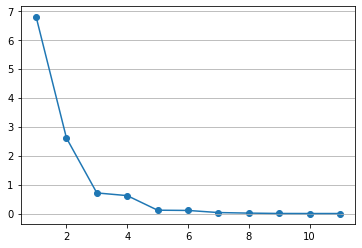

In [128]:
plt.scatter(range(1, df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show() #Factor가 3개일때만 1을 넘는다. -> 

## Factor Analysis

In [129]:
fa.analyze(df, 3, rotation="varimax")
#각 loading 값들이 최대한 서로 다르게 하기위해 Varimax rotation 실행.

In [130]:
fa.loadings #factor loading = L, 이며 L은 factor간 선형결합의 weight를 의미함.
# L을 추정하는것이 중요한데 

,Factor1,Factor2,Factor3
RUN,0.115220,0.941876,0.086534
P_HRA_RT,0.117045,0.563457,0.044115
AVG,0.955662,0.158168,0.176348
SLG,0.768351,0.172860,0.606398
IsoP,0.430047,0.150672,0.887846
OBP,0.892998,0.179282,0.292957
OPS,0.838508,0.179219,0.515489
RC,0.143124,0.943589,0.105534
XR,0.147285,0.944493,0.112305
wOBA,0.861966,0.180838,0.465318


**F1(타율,출루계열)** : AVG, OBP, wOBA, BABIP <br>
AVG(타율), OBP(출루율), wOBA(가중 출루율), BABIP

**F2(득점계열)** : RUN, P_HRA_RT, RC, XR <br>
RUN(득점), P_HHA_RT(득점권타율), RC(득점기여도), XR(득점 공헌도)

**F3(장타율계열)** : SLG, IsoP, OPS <br>
SLG(장타율), IsoP(순장타율), ops(출루율+장타율)

In [131]:
fa.get_factor_variance()
# Total 86% cumulative Variance explained by the 3 factors.

,Factor1,Factor2,Factor3
SS Loadings,4.928951,3.175048,1.788497
Proportion Var,0.448086,0.288641,0.162591
Cumulative Var,0.448086,0.736727,0.899318


In [132]:
X = df.values
fa = FactorAnalysis(n_components=3)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df_fa =pd.DataFrame(data=X_fa, columns=['hit_f1','hit_f2','hit_f3'])
df_fa['WLS'] = team_hit_2016['WLS']
df_fa['G_ID'] = team_hit_2016['G_ID']
df_fa['T_ID'] = team_hit_2016['T_ID']
df_fa['TB_SC'] = team_hit_2016['TB_SC']

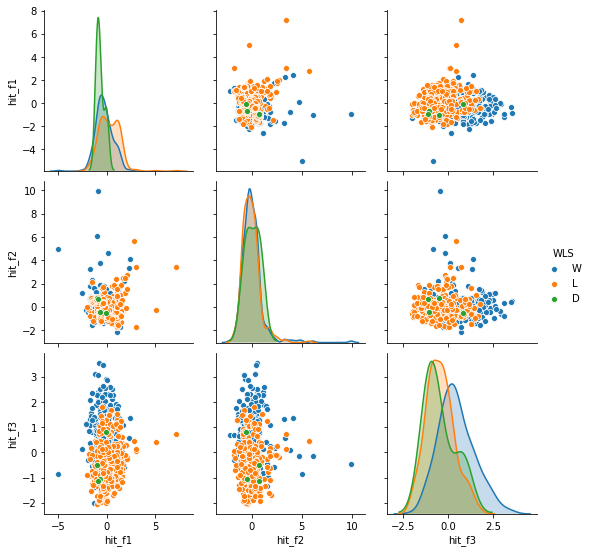

In [133]:
sns.pairplot(data=df_fa, hue='WLS')

In [134]:
from mpl_toolkits import mplot3d

In [135]:
from sklearn.cluster import KMeans

In [136]:
kmeans = KMeans(n_clusters=3).fit(df_fa[['hit_f1','hit_f2','hit_f3']])

In [137]:
df_fa['cluster_hit'] = kmeans.labels_

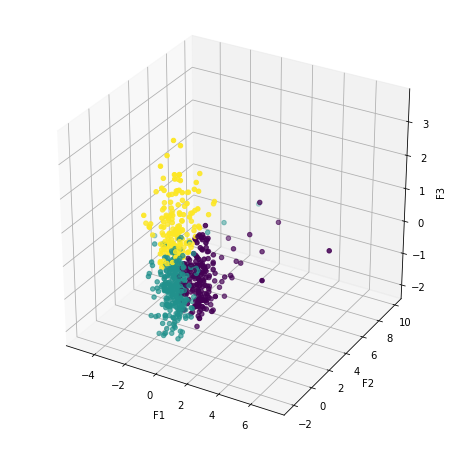

In [138]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_fa['hit_f1'],df_fa['hit_f2'],df_fa['hit_f3'],c=df_fa['cluster_hit'])
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3',rotation=90)
plt.show()

# <center> Pitcher </center>
<img src="http://sportsgroundproduction.blob.core.windows.net/cms/14732/newsarticles/63254_wo.jpg" width="220">

In [139]:
team_pit_2016.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,OOPS,WHIP,BABIP,DICE,ERA,RA9,FIP,kFIP,HR/9,H/9
0,20200505HHSK0,20200505,SK,HH,0,B,0,L,0,27,...,0.657869,0.466667,0.307692,0.000000,0.272727,0.272727,0.000000,0.00,0.000000,0.567568
1,20200505HHSK0,20200505,HH,SK,0,T,1,W,0,27,...,0.168966,0.000000,0.074074,0.078947,0.000000,0.000000,0.078947,0.00,0.000000,0.000000
2,20200505LTKT0,20200505,KT,LT,0,B,0,L,0,27,...,0.734797,0.533333,0.227273,0.631579,0.636364,0.636364,0.631579,0.75,0.666667,0.472973
3,20200505LTKT0,20200505,LT,KT,0,T,0,W,0,27,...,0.585714,0.466667,0.190476,0.421053,0.181818,0.181818,0.421053,0.50,0.333333,0.283784
4,20200505NCSS0,20200505,SS,NC,0,B,0,L,0,27,...,0.802597,0.400000,0.190476,0.815789,0.363636,0.363636,0.815789,0.95,1.000000,0.472973


In [140]:
features = ['R','ER','P_WHIP_RT','K/9','BB/9','K/BB','OAVG','OOBP','OSLG','OOPS','WHIP','BABIP','DICE',
                                               'ERA','RA9','FIP','kFIP','HR/9','H/9']
df = team_pit_2016.loc[:,features]

In [141]:
fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,9.602074e+00
1,3.569873e+00
2,2.176421e+00
3,1.326041e+00
4,1.221335e+00
5,5.596415e-01
6,2.796827e-01
7,1.197555e-01
8,4.519571e-02
9,4.093115e-02


<function matplotlib.pyplot.show(*args, **kw)>

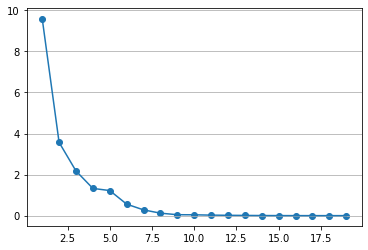

In [142]:
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show # 4개 선택

In [143]:
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4
R,0.129164,0.073317,0.982643,-0.000218
ER,0.111055,0.073267,0.956354,0.002570
P_WHIP_RT,0.126102,0.040981,0.548693,0.073180
K/9,-0.135778,-0.104793,-0.030718,-0.083539
BB/9,0.125277,0.296486,0.036439,0.805020
K/BB,-0.182813,-0.282867,-0.042923,-0.890555
OAVG,0.982076,0.051335,0.102975,-0.044068
OOBP,0.882124,0.161934,0.104674,0.367267
OSLG,0.820720,0.472487,0.109420,0.001919
OOPS,0.886013,0.376823,0.111643,0.139525


F1 : K/9, K/BB, OSLG, DICE, FIP, kFIP, HR/9
9이닝당 탈삼진개수, 볼삼비, 피장타율, 유사 평군자책점,
수비무관평균자책점, 한국프로야구의 수비무관평균자책점,
9이닝당 피홈런개수

F2 : OAVG, OOBP, OOPS, WHIP, BABIP, ERA, RA9, H/9
피안타율, 피출루율, 피OPS, 이닝 당 출루허용, 인플레이 타구 피안타율,
평균자책점, 9이닝당평균실점, 9이닝당 피안타개수

F3 : R, ER, P_WHIP_RT
실점, 자책점, 득점권WHIP

F4 : BB/9
9이닝당 볼넷개수

In [144]:
fa.get_factor_variance()
# Total 87% cumulative Variance explained by the 4 factors.

,Factor1,Factor2,Factor3,Factor4
SS Loadings,7.498246,4.148685,2.325050,2.322126
Proportion Var,0.394645,0.218352,0.122371,0.122217
Cumulative Var,0.394645,0.612996,0.735367,0.857585


In [145]:
X = df.values
fa = FactorAnalysis(n_components=4)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df2_fa =pd.DataFrame(data=X_fa, columns=['pit_f1','pit_f2','pit_f3','pit_f4'])
df2_fa['WLS'] = team_pit_2016['WLS']
df2_fa['G_ID'] = team_pit_2016['G_ID']
df2_fa['T_ID'] = team_pit_2016['T_ID']
df2_fa['TB_SC'] = team_pit_2016['TB_SC']
kmeans = KMeans(n_clusters=3).fit(df2_fa[['pit_f1','pit_f2','pit_f3','pit_f4']])
df2_fa['cluster_pit'] = kmeans.labels_

In [146]:
# sns.pairplot(data=df2_fa, hue='WLS')

## K-means clustering

In [147]:
final_fa = pd.merge(df_fa,df2_fa, on=['G_ID','T_ID','TB_SC','WLS'])

In [148]:
kmeans = KMeans(n_clusters=3).fit(final_fa[['hit_f1','hit_f2','hit_f3','pit_f1','pit_f2','pit_f3','pit_f4']])
final_fa['cluster_play'] = kmeans.labels_

In [149]:
cross_play = pd.crosstab(final_fa['cluster_play'],final_fa['T_ID'])
cross_play

T_ID,HH,HT,KT,LG,LT,NC,OB,SK,SS,WO
cluster_play,,,,,,,,,,
0,2,0,2,1,5,63,0,3,8,2
1,1,53,61,63,35,0,62,1,0,64
2,62,9,1,0,22,0,2,61,57,0


In [161]:
cross_hit = pd.crosstab(final_fa['cluster_hit'],final_fa['T_ID'])
cross_pit = pd.crosstab(final_fa['cluster_pit'],final_fa['T_ID'])
# 2019는 cross_hit.iloc[0][4] = 22
def cluster_max(crosstable,name):
    cluster_team = crosstable.apply(lambda x: np.where(x==max(x)))
    cluster_team = cluster_team.apply(lambda x: int(sum(x)))
    cluster_team = pd.DataFrame(cluster_team)
    cluster_team = cluster_team.reset_index()
    cluster_team.columns = ['T_ID',name]
    return(cluster_team)

In [170]:
cluster = pd.merge(final_fa, cluster_max(cross_hit,'cluster_team_hit'),on='T_ID')
cluster = pd.merge(cluster, cluster_max(cross_pit,'cluster_team_pit'),on='T_ID')

In [171]:
cluster = cluster[['G_ID','T_ID','TB_SC','WLS','cluster_team_hit','cluster_team_pit','hit_f1','hit_f2','hit_f3','pit_f1','pit_f2','pit_f3','pit_f4']]

In [172]:
cluster.to_csv('cluster2020.csv')

In [173]:
for year in range(2016,2021):
    data = pd.read_csv('cluster'+str(year)+'.csv')
    if year==2016:
        df = data 
    else:
        df = pd.concat([df, data])

In [174]:
df

,Unnamed: 0,G_ID,T_ID,TB_SC,WLS,cluster_team_hit,cluster_team_pit,hit_f1,hit_f2,hit_f3,pit_f1,pit_f2,pit_f3,pit_f4
0,0,20160401HHLG0,HH,T,L,2,1,3.246649,-0.672442,0.381691,3.257575,1.922055,-0.487703,0.570372
1,1,20160402HHLG0,HH,T,L,2,1,1.916625,-1.703314,0.501447,-0.109634,2.675800,-1.352436,0.990402
2,2,20160405WOHH0,HH,B,W,2,1,0.486276,-2.875870,0.584646,-0.112498,3.966649,-1.334058,-0.153833
3,3,20160406WOHH0,HH,B,L,2,1,-0.270843,-0.113845,-0.067797,0.104077,4.892921,-2.322669,0.605231
4,4,20160407WOHH0,HH,B,L,2,1,-0.529489,1.215862,0.112625,0.576330,4.565678,-0.419101,0.877013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,635,20200715NCWO0,WO,B,W,1,1,-0.476196,0.312315,0.451253,-1.190928,-0.689573,0.608836,-0.392388
636,636,20200716NCWO0,WO,B,L,1,1,-0.408168,0.292218,-1.345102,-1.151162,-0.768168,0.573144,1.053459
637,637,20200717WOSK0,WO,T,L,1,1,-0.460228,0.257941,1.789210,-1.024169,-0.823338,0.563955,1.841487
638,638,20200718WOSK0,WO,T,W,1,1,-0.452498,0.318314,-0.297156,-1.058359,-0.674291,0.546792,-1.306459


In [217]:
what = df[ df['T_ID']=='HH' ]['WLS']

In [218]:
what

0     L
1     L
2     W
3     L
4     L
     ..
60    W
61    L
62    L
63    L
64    L
Name: WLS, Length: 641, dtype: object